In [49]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os, re
import matplotlib.colors as mcolors
def find_closest(value, series):
    return series.iloc[(series - value).abs().argsort()[:1]].values[0]

### Plot Cu K-edge EXAFS

003_Cu-6Sm_Activation_dwell_2
003_Cu-6Sm_Activation_dwell_1
005_Cu-6Sm_Reaction_T1_2
005_Cu-6Sm_Reaction_T1_1
007_Cu-6Sm_Reaction_T2_2
007_Cu-6Sm_Reaction_T2_1
009_Cu-6Sm_Reaction_T3_2
009_Cu-6Sm_Reaction_T3_1
011_Cu-6Sm_Reaction_T4_2
011_Cu-6Sm_Reaction_T4_1


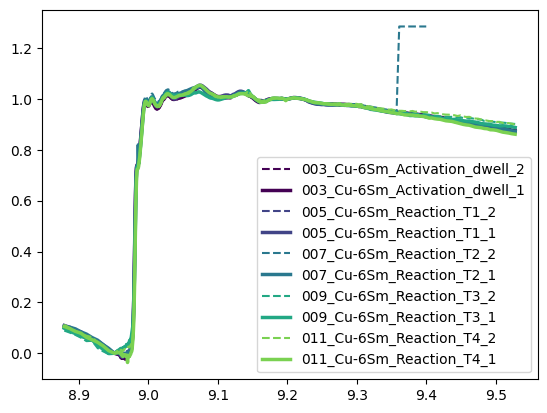

In [50]:
search_string = "Cu_K_EXAFS_merged"
var1="diode1"
var2="AS_IC"
monoE_min = 8.95
monoE_max = 9.2

labeled_files= []
for root, dirs, files in os.walk("."):
    files.sort() 
    for i, file in enumerate(files):
        if search_string in file:
            subfolder_name = os.path.basename(root)
            file_path = os.path.join(root, file)
            label = f"{subfolder_name}_{i % 2 + 1}"
            labeled_files.append((file_path, label))
labeled_files.sort()

cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=0, vmax=len(labeled_files) / 2)
for idx, (file_path, label) in enumerate(labeled_files):
    print (label)
    result_df = pd.read_csv(file_path)

    closest_monoE1 = find_closest(monoE_min, result_df['monoE'])
    closest_monoE2 = find_closest(monoE_max, result_df['monoE'])

# Extract the values of '{var1}/{var2}_mean' for the closest monoE values
    signal_min = result_df.loc[result_df['monoE'] == closest_monoE1, f'{var1}/{var2}_mean'].values[0]
    signal_max = result_df.loc[result_df['monoE'] == closest_monoE2, f'{var1}/{var2}_mean'].values[0]

    color = cmap(norm(idx // 2))  # Use the same color for pairs

    x = result_df['monoE']
    y = (result_df[f'{var1}/{var2}_mean'] - signal_min)/(signal_max - signal_min)

    if label.endswith('_1'):
        plt.plot(x, y, label=label, linewidth=2.5, color=color)
    elif label.endswith('_2'):
        plt.plot(x, y, color=color, linestyle='--', linewidth=1.5, label=label)

    #plt.fill_between(result_df['monoE'],
                   # result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                   # result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                   # color='blue', alpha=0.2, )
plt.legend(loc=0)